In [2]:
##Install pandas Data Reader
!pip install pandas-datareader

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [70]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [5]:
type(df_tesla)

pandas.core.frame.DataFrame

In [6]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-14,715.960022,688.000000,704.690002,714.940002,26185800.0,714.940002
2022-07-15,730.869995,710.669983,720.000000,720.200012,23165500.0,720.200012
2022-07-18,751.549988,718.809998,734.809998,721.640015,27512500.0,721.640015
2022-07-19,741.419983,710.929993,735.000000,736.590027,26885000.0,736.590027
2022-07-20,751.952820,730.448975,740.349976,746.250000,14259085.0,746.250000


<AxesSubplot:xlabel='Date'>

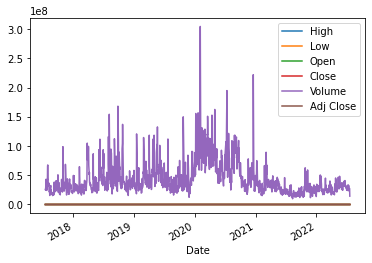

In [7]:
df_tesla.plot()

<AxesSubplot:xlabel='Date'>

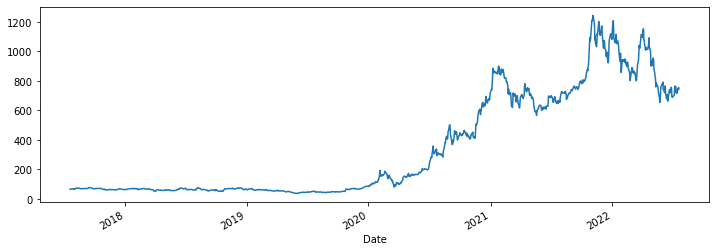

In [8]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

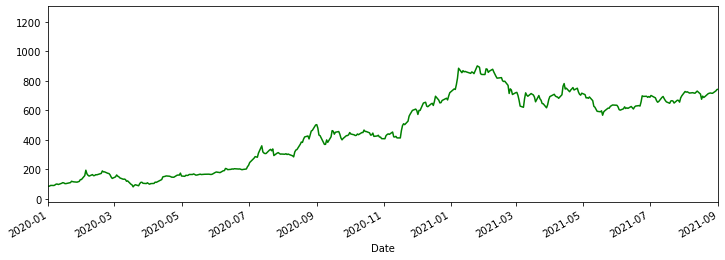

In [9]:
##xlimit and ylimit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4),c='green')

<AxesSubplot:xlabel='Date'>

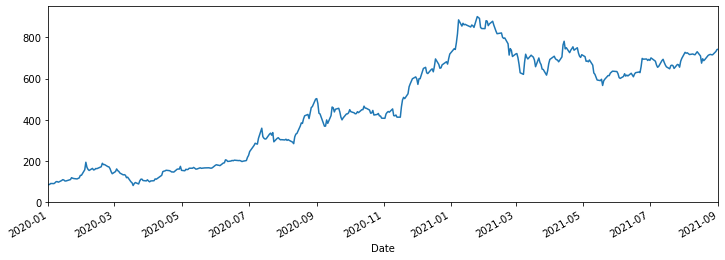

In [10]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,950],figsize=(12,4))

In [11]:
df_tesla.index

DatetimeIndex(['2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02',
               ...
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-18',
               '2022-07-19', '2022-07-20'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [12]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [13]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [14]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

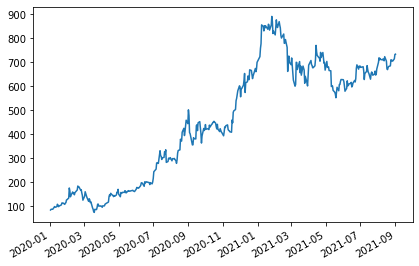

In [16]:
figure, axis=plt.subplots()
plt.tight_layout()
#prevent overlapping of xaxis labels
figure.autofmt_xdate()
axis.plot(index,share_open)

In [17]:
##Datetime index

In [18]:
df_tesla = df_tesla.reset_index()

In [19]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [20]:
##for setting date as index
df_tesla = df_tesla.set_index('Date', drop=True)

In [21]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000
2017-07-24,68.680000,66.001999,66.047997,68.503998,43185500.0,68.503998
2017-07-25,69.120003,66.830002,69.000000,67.919998,34946000.0,67.919998
2017-07-26,69.099998,67.624001,68.071999,68.769997,24104000.0,68.769997


In [23]:
##datetime
from datetime import datetime

In [26]:
datetime(2021,2,21)

datetime.datetime(2021, 2, 21, 0, 0)

In [27]:
datetime.now()

datetime.datetime(2022, 7, 20, 21, 24, 0, 102051)

In [29]:
date=datetime(2021,10,21)
date

datetime.datetime(2021, 10, 21, 0, 0)

In [34]:
print(date.day)
print(date.weekday())
print(date.year)

21
3
2021


# Time Resampling

In [36]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000
2017-07-24,68.680000,66.001999,66.047997,68.503998,43185500.0,68.503998
2017-07-25,69.120003,66.830002,69.000000,67.919998,34946000.0,67.919998
2017-07-26,69.099998,67.624001,68.071999,68.769997,24104000.0,68.769997


In [43]:
## Resampling rules
## https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

<AxesSubplot:xlabel='Date'>

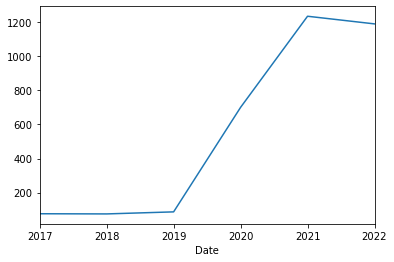

In [44]:
## rule='A' :  year end frequency 
df_tesla.resample(rule='A').max()['Open'].plot()

In [46]:
## rule='A' :  quarterly start frequency 
df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-01,77.921997,75.536003,76.050003,77.000000,67675000.0,77.000000
2017-10-01,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-01,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-01,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2019-04-01,59.234001,57.433998,57.660000,58.362000,132735500.0,58.362000
2019-07-01,53.214001,51.632000,51.834000,52.976002,112091500.0,52.976002


<AxesSubplot:xlabel='Date'>

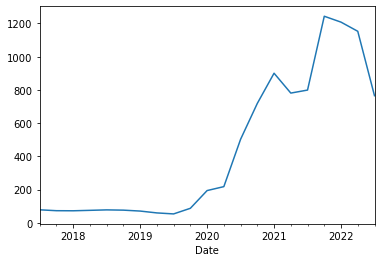

In [47]:
df_tesla.resample(rule='QS').max()['High'].plot()

In [48]:
## Business-Year End Frequency
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.536003,76.050003,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [49]:
## Business-Quarter End Frequency
df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,77.921997,75.536003,76.050003,77.000000,67675000.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2019-04-01,59.234001,57.433998,57.660000,58.362000,132735500.0,58.362000
2019-07-01,53.214001,51.632000,51.834000,52.976002,112091500.0,52.976002


<AxesSubplot:xlabel='Date'>

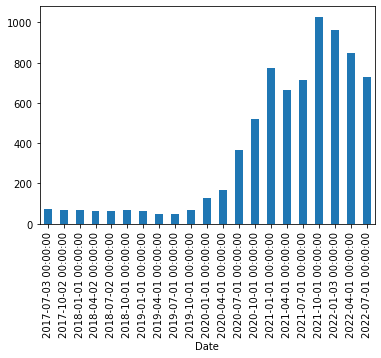

In [51]:
## PLOTTING
df_tesla['High'].resample(rule='BQS').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

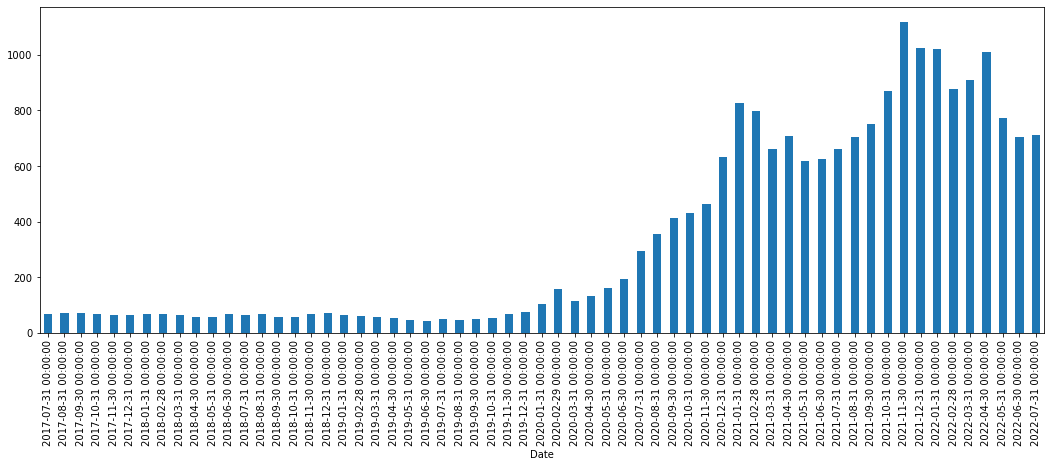

In [53]:
df_tesla['Open'].resample(rule='M').mean().plot(kind='bar', figsize = (18,6) )

# ROLLING & EXPANDING

In [55]:
df_tesla['High'].head()

Date
2017-07-20    66.043999
2017-07-21    66.251999
2017-07-24    68.680000
2017-07-25    69.120003
2017-07-26    69.099998
Name: High, dtype: float64

In [57]:
df_tesla['High'].rolling(5)

Rolling [window=5,center=False,axis=0]

In [66]:
#rolling avg with a window of 5
df_tesla['High'].rolling(5).mean().head(10)

Date
2017-07-20          NaN
2017-07-21          NaN
2017-07-24          NaN
2017-07-25          NaN
2017-07-26    67.839200
2017-07-27    68.530400
2017-07-28    68.864000
2017-07-31    68.787599
2017-08-01    67.941599
2017-08-02    67.206400
Name: High, dtype: float64

In [74]:
df_tesla['Open:30_days_rolling'] = df_tesla['Open'].rolling(30).mean()

In [75]:
df_tesla.head(15)

,High,Low,Open,Close,Volume,Adj Close,Open:10_days_rolling,Open:30_days_rolling
Date,,,,,,,,
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001,NaN,NaN
2017-07-21,66.251999,65.160004,65.891998,65.680000,24508000.0,65.680000,NaN,NaN
2017-07-24,68.680000,66.001999,66.047997,68.503998,43185500.0,68.503998,NaN,NaN
2017-07-25,69.120003,66.830002,69.000000,67.919998,34946000.0,67.919998,NaN,NaN
2017-07-26,69.099998,67.624001,68.071999,68.769997,24104000.0,68.769997,NaN,NaN
2017-07-27,69.500000,65.258003,69.199997,66.891998,41512000.0,66.891998,NaN,NaN
2017-07-28,67.919998,66.501999,67.377998,67.014000,24402000.0,67.014000,NaN,NaN
2017-07-31,68.297997,64.208000,67.099998,64.694000,42675500.0,64.694000,NaN,NaN
2017-08-01,64.889999,63.226002,64.599998,63.914001,41515500.0,63.914001,NaN,NaN


<AxesSubplot:xlabel='Date'>

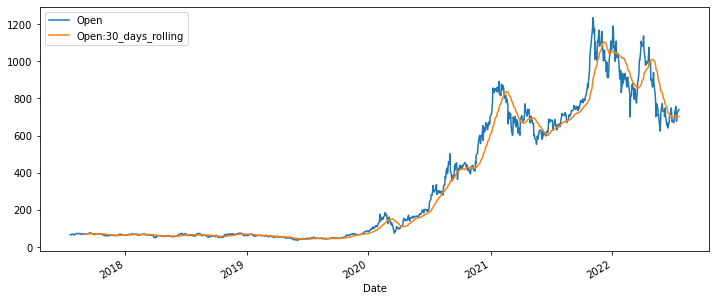

In [76]:
df_tesla[['Open','Open:30_days_rolling']].plot(figsize=(12,5))

In [78]:
## The above plot orange line is an example of smoothing also. 

##  Assignment:

1. Read the accenture data using pandas datareader
2. get the max price of the share from 2017 to 2022
3. which is the date of the highest price of stock?
4. which is the date of the lowest price of stock?


In [82]:
df_acc = pdr.get_data_yahoo('ACN')

In [83]:
df_acc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-20,128.759995,127.650002,127.900002,128.539993,1655300.0,118.968399
2017-07-21,128.960007,128.009995,128.539993,128.850006,1765400.0,119.255341
2017-07-24,128.500000,127.589996,128.270004,128.009995,1763200.0,118.477875
2017-07-25,129.309998,127.680000,128.250000,128.949997,1600000.0,119.347870
2017-07-26,129.610001,128.740005,129.000000,129.509995,1615300.0,119.866158


In [85]:
df_acc.loc['2017-01-01':'2022-01-01']['High']

Date
2017-07-20    128.759995
2017-07-21    128.960007
2017-07-24    128.500000
2017-07-25    129.309998
2017-07-26    129.610001
                 ...    
2021-12-27    415.950012
2021-12-28    417.149994
2021-12-29    417.369995
2021-12-30    416.660004
2021-12-31    416.950012
Name: High, Length: 1122, dtype: float64

In [86]:
df_acc.loc['2017-01-01':'2022-01-01']['High'].max()

417.3699951171875

In [87]:
df_acc.loc['2017-01-01':'2022-01-01']['Low'].min()

127.26000213623047

In [88]:
df_acc.loc['2017-01-01':'2022-01-01']['High'].max()

417.3699951171875